# Regressione logistica

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
ore=[0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5]
successo=[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]
df=pd.DataFrame({"ore":ore,"successo":successo})

<AxesSubplot:xlabel='ore', ylabel='successo'>

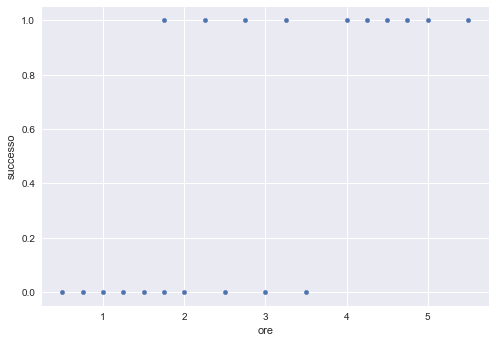

In [8]:
df.plot(kind="scatter",x="ore",y="successo")

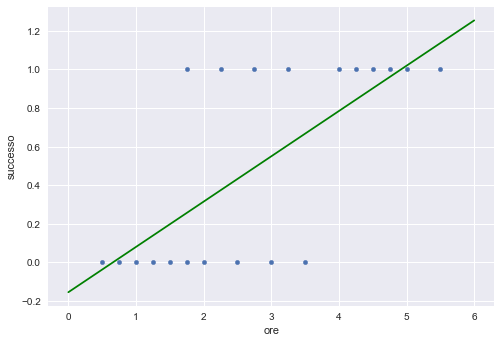

In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True)
lm.fit(X=df.ore.to_frame(),y=df.successo)
df["predicted"]=lm.predict(df.ore.to_frame())
df.plot(kind="scatter",x="ore",y="successo")
plt.plot(np.array([0,6]),lm.intercept_+lm.coef_*np.array([0,6]), color="Green")

In [24]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X=df.ore.to_frame(),y=df.successo)
df["predicted"]=lm.predict(df.ore.to_frame())
df

ore  successo  predicted  predicted2
0   0.50         0          0           0
1   0.75         0          0           0
2   1.00         0          0           0
3   1.25         0          0           0
4   1.50         0          0           0
5   1.75         0          0           0
6   1.75         1          0           0
7   2.00         0          0           0
8   2.25         1          0           0
9   2.50         0          0           0
10  2.75         1          1           0
11  3.00         0          1           1
12  3.25         1          1           1
13  3.50         0          1           1
14  4.00         1          1           1
15  4.25         1          1           1
16  4.50         1          1           1
17  4.75         1          1           1
18  5.00         1          1           1
19  5.50         1          1           1

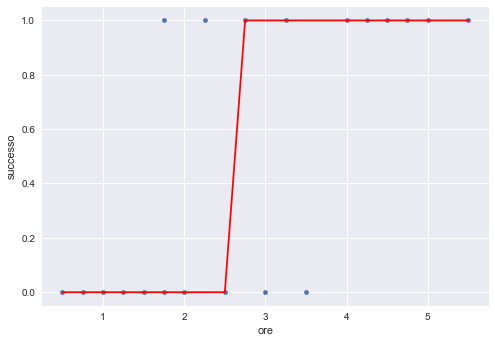

In [25]:
df.plot(kind="scatter",x="ore",y="successo")
plt.plot(df.ore,df.predicted,color="Red") # questo grafico funziona solo se ore sono in ordine!

In [27]:
lm.predict_proba(df.ore.to_frame()) # [fail , pass]

array([[0.92858952, 0.07141048],
       [0.90704455, 0.09295545],
       [0.87984046, 0.12015954],
       [0.84602638, 0.15397362],
       [0.80480773, 0.19519227],
       [0.75574059, 0.24425941],
       [0.75574059, 0.24425941],
       [0.69895285, 0.30104715],
       [0.63533317, 0.36466683],
       [0.56660539, 0.43339461],
       [0.49521602, 0.50478398],
       [0.42402118, 0.57597882],
       [0.3558463 , 0.6441537 ],
       [0.29305565, 0.70694435],
       [0.18924992, 0.81075008],
       [0.14905371, 0.85094629],
       [0.11617173, 0.88382827],
       [0.08977835, 0.91022165],
       [0.06891381, 0.93108619],
       [0.04000986, 0.95999014]])

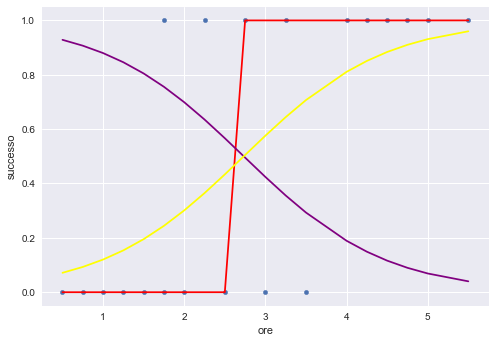

In [38]:
df.plot(kind="scatter",x="ore",y="successo")
plt.plot(df.ore,df.predicted,color="Red") # questo grafico funziona solo se ore sono in ordine!
plt.plot(df.ore,lm.predict_proba(df.ore.to_frame())[:,0], color="Purple",linestyle="-") #fail
plt.plot(df.ore,lm.predict_proba(df.ore.to_frame())[:,1],color="Yellow",linestyle="-") #pass
